Let's `import` useful packages to do EDA on the dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
style.use(style='seaborn-whitegrid')

In [5]:
pd.set_option('display.precision', 4)

---

__Dataset__

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Download the __Haberman Dataset__ from [here](https://www.kaggle.com/gilsousa/habermans-survival-data-set).

Kaggle API: `kaggle datasets download -d gilsousa/habermans-survival-data-set`

Now let's read the dataset.

In [6]:
data_df = pd.read_csv(filepath_or_buffer='haberman.csv')

In [7]:
display(data_df.head(n=10))

,age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


If we notice, __`age`__ and __`op_year`__ values are bit confusing. And we know from the description of the dataset at [here](https://www.kaggle.com/gilsousa/habermans-survival-data-set), that __`op_year`__ happens to be in $1900$'s.

Let's preprocess the __`op_year`__ feature by adding $1900$ to each data-point.

In [8]:
data_df['op_year'] = data_df['op_year'].apply(func=lambda x: 1900 + x)

In [9]:
display(data_df.head(n=10))

,age,op_year,axil_nodes,surv_status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1
5,33,1958,10,1
6,33,1960,0,1
7,34,1959,0,2
8,34,1966,9,2
9,34,1958,30,1


Now the dataset looks understandable and cleaner.

---

Some background understanding.

What are [Axillary Nodes](https://en.wikipedia.org/wiki/Axillary_lymph_nodes)?

The axillary lymph nodes or armpit lymph nodes are lymph nodes in the human armpit. Between $20$ and $49$ in number, they drain lymph vessels from the lateral quadrants of the breast, the superficial lymph vessels from thin walls of the chest and the abdomen above the level of the navel, and the vessels from the upper limb. They are divided in several groups according to their location in the armpit. These lymph nodes are clinically significant in breast cancer, and metastases from the breast to the axillary lymph nodes are considered in the staging of the disease.

![](axillary_node.png)

Image description: Lymphatics of the breast and the axillary glands

Image source: [here](https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Gray607.png/375px-Gray607.png)

---

__1.1 Analyze high level statistics of the dataset: number of points, number of features, number of classes, data-points per class__

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


From the above output, we learn that, dataset has 4 attributes/columns which includes class attribute as well.

- __`age`__: Age of patient at time of operation.
- __`op_year`__: Patient's year of operation.
- __`axil_nodes`__: Number of positive axillary nodes detected.
- __`surv_status`__: Survival status. This is a __class attribute__, encoded as below,
    - $1$ = the patient survived 5 years or longer
    - $2$ = the patient died within 5 year

There are $306$ rows. All the columns are of numerical type. We also learn that the dataset doesn't have any `NULL` values, which is good.

Features and Target(s)

We will now assign features and class-label (target) for ease of understanding and we shall use these features and the target in our further analysis.

In [11]:
features = list(data_df.columns)[:-1]
target = list(data_df.columns)[-1]

print("All the features in the dataset: {}".format(features))
print("Target class in the dataset: '{}'".format(target))

All the features in the dataset: ['age', 'op_year', 'axil_nodes']
Target class in the dataset: 'surv_status'


Now let's understand how many data-points we have in `surv_status` target.

In [12]:
display(data_df[[target]].value_counts())

surv_status
1              225
2               81
dtype: int64

This dataset is an __imbalanced__ dataset, because number of data-points of the class $1$ is not equal to number of data-points of the class $2$.

Let's calculate basic descriptive statistics for our dataset features.

In [13]:
display(data_df[features].describe())

,age,op_year,axil_nodes
count,306.0000,306.0000,306.0000
mean,52.4575,1962.8529,4.0261
std,10.8035,3.2494,7.1897
min,30.0000,1958.0000,0.0000
25%,44.0000,1960.0000,0.0000
50%,52.0000,1963.0000,1.0000
75%,60.7500,1965.7500,4.0000
max,83.0000,1969.0000,52.0000


`age` feature

- There are $306$ data-points.
- The average age is $52.457$ years.
- The standard deviation is $10.803$.
- The minimum age in the dataset is $30$ years.
- The $25^{th}$ percentile is $44$ years, which implies $25\%$ of the patients' age are $\le 44$ years.
- The $50^{th}$ percentile is $52$ years, which implies $50\%$ of the patients' age are $\le 52$ years.
- The $75^{th}$ percentile is $60.75$ years, which implies $75\%$ of the patients' age are $\le 60.75$ years.
- The maximum age in the dataset is $83$ years.

`op_year` feature

- There are $306$ data-points.
- The average year date is $1962.853$.
- The standard deviation is $3.249$.
- The minimum operation year date in the dataset is $1958$.
- The $25^{th}$ percentile is $1960$ year date, which implies $25\%$ of the patients' operation year dates are $\le 1960$.
- The $50^{th}$ percentile is $1963$ year date, which implies $50\%$ of the patients' operation year dates are $\le 1963$.
- The $75^{th}$ percentile is $1965.75$ year date, which implies $75\%$ of the patients' operation year dates are $\le 1965.75$.
- The maximum operation year date in the dataset is $1969$.

`axil_nodes` feature

- There are $306$ data-points.
- The average number of axillary nodes are $4.02$.
- The standard deviation is $7.189$.
- The minimum number of axillary nodes are $0$.
- The $25^{th}$ percentile is $0$, which implies $25\%$ of the patients' axillary nodes in the body are $\le 0$.
- The $50^{th}$ percentile is $1$, which implies $50\%$ of the patients' axillary nodes in the body are $\le 1$.
- The $75^{th}$ percentile is $4$, which implies $75\%$ of the patients' axillary nodes in the body are $\le 4$.
- The maximum number of axillary nodes are $52$.

We will see this visually in the report.

Now, let's find the most repeated values for each feature in the dataset.

In [14]:
display(data_df[features].mode())

,age,op_year,axil_nodes
0,52,1958,0


Let's understand a bit more, using `seaborn.swarmplot()`.

In [15]:
def swarm_plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 8))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('13' + '{}'.format(i+1)))
        sns.swarmplot(y=df[feature], x=[""]*len(df),
                      linewidth=0.5,
                      hue=df[target],
                      palette='Paired_r')
        plt.title(label=feature)
        i += 1
    plt.suptitle(t='Swarm Plot - Haberman Dataset Features')
    plt.show()
    plt.close(fig='all')
    return None

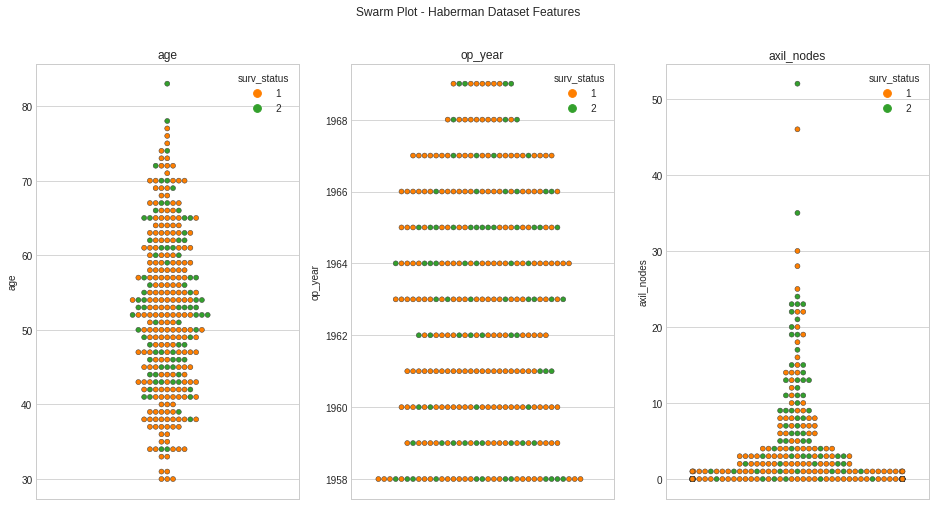

In [16]:
swarm_plotter(df=data_df, features=features)

- From `age` feature, we observe, $52$ is repeated quite often and is nearly equal to the average which we found earlier. There is one outlier in this feature, where the patient's age is $83$ years.
- From `op_year` feature, we observe, more operations took place in the year date $1958$. There is no sign of outliers in this feature.
- From `axil_nodes` feature, we observe, $0$ and $1$ axillary nodes are most common. We also observe couple of outliers present in this feature.

---

__1.2 Explain the objective of the problem__

Objective

- To understand the dataset and convert the raw data into useful reports/information.
- Reports of useful information can be obtained from the raw data by performing descriptive statistics, univariate and multivariate analysis.
- To articulate the reports with the rest of the team in an understandable way.

---

__1.3 Perform univariate analysis - Plot PDF, CDF, Box plots__

- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in Python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

Distribution Plot

In [17]:
def dist_plotter(df, features, hue=False):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 8))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('13' + '{}'.format(i+1)))
        if hue:
            sns.histplot(x=df[feature],
                         hue=df[target],
                         kde=True,
                         palette='Set2_r')
        else:
            sns.distplot(x=df[feature],
                         kde=True,
                         hist_kws={'color': '#5DADE2'},
                         kde_kws={'color': '#EC7063', 'label': 'PDF'})
            plt.legend()
        plt.title(label=feature)
        i += 1
    plt.suptitle(t='Distribution Plot - Haberman Dataset Features')
    plt.show()
    plt.close(fig='all')
    return None

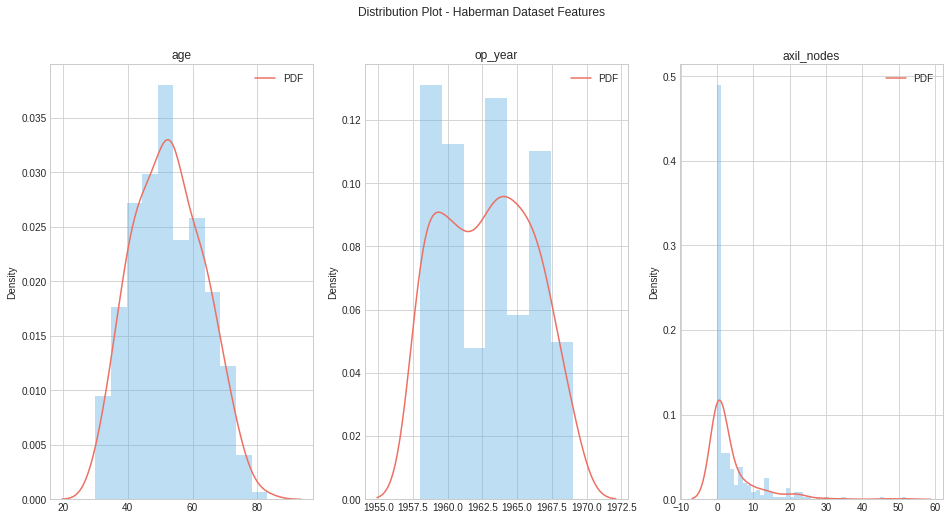

In [18]:
dist_plotter(df=data_df, features=features, hue=False)

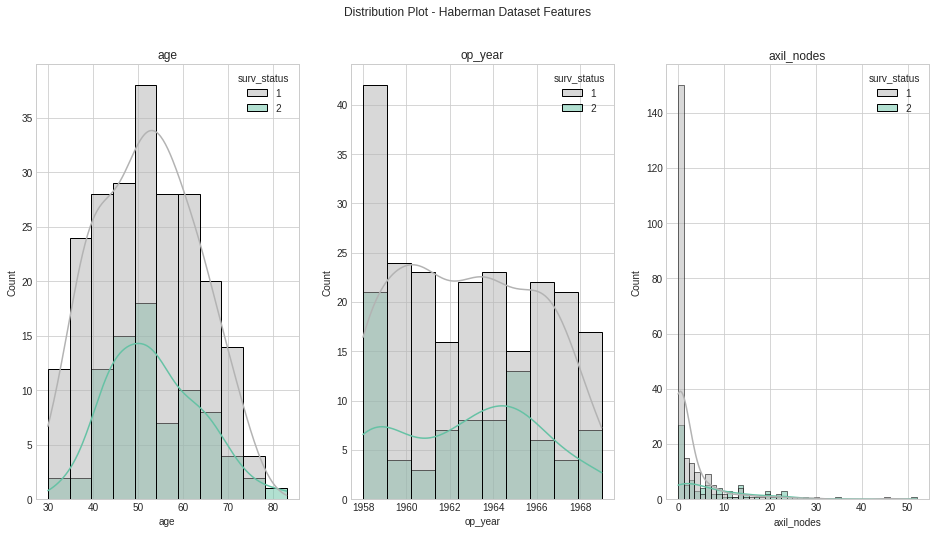

In [19]:
dist_plotter(df=data_df, features=features, hue=True)

The histogram plot can also be combined with `KDE` to plot the PDF curve for each feature.

- From the above Distribution plot, we observe that, no feature is well separating the `surv_status` class attribute. We also see a lot of overlap between the `surv_status` classes.

PDF Plot

In [20]:
def pdf_plotter(df, features, hue=False):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 8))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('13' + '{}'.format(i+1)))
        if hue:
            sns.kdeplot(x=df[feature],
                        hue=df[target],
                        shade=True,
                        palette='rainbow')
        else:
            sns.kdeplot(x=df[feature],
                        shade=True,
                        color='peru')
        plt.title(label=feature)
        i += 1
    plt.suptitle(t='PDF Plot - Haberman Dataset Features')
    plt.show()
    plt.close(fig='all')
    return None

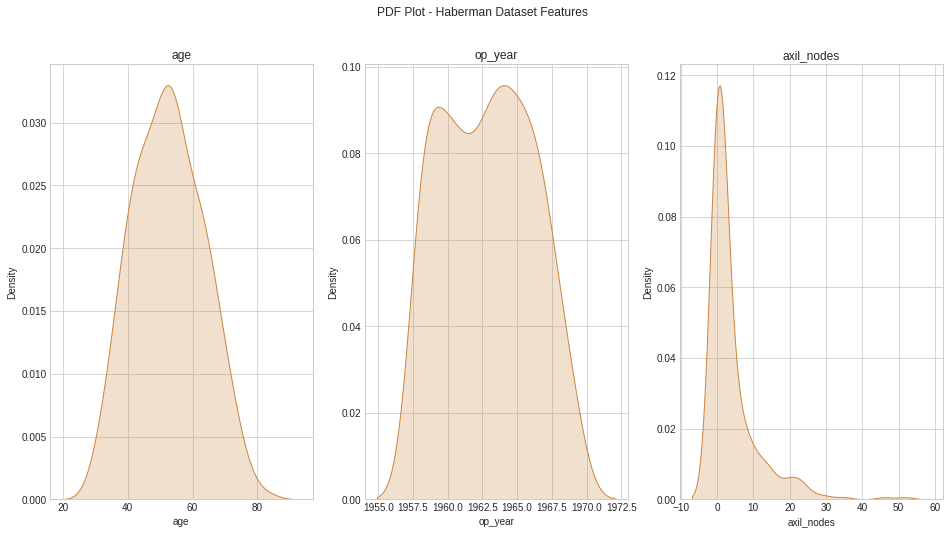

In [21]:
pdf_plotter(df=data_df, features=features, hue=False)

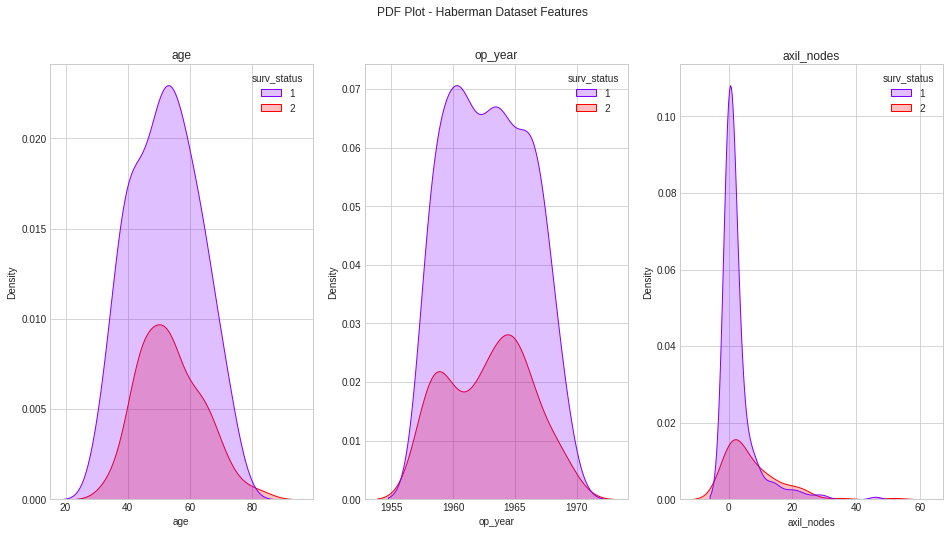

In [22]:
pdf_plotter(df=data_df, features=features, hue=True)

The above two plots are a PDF (Probability Density Function) plot with `hue` turned off and on.

- From the $2^{nd}$ PDF plot, we see that, none of the features separate the class attributes. Both the class attributes are overlapping. Hence it will be hard which determine which feature is good and which is not.

CDF Plot

In [23]:
def cdf_plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 8))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('13' + '{}'.format(i+1)))
        sns.kdeplot(x=df[feature],
                    shade=True,
                    cumulative=True,
                    color='g')
        plt.ylabel(ylabel='Probability')
        plt.title(label=feature)
        percentiles = np.percentile(a=df[feature],
                                    q=np.array([25, 50, 75]))
        for quantile in percentiles:
            plt.axvline(x=quantile, ls='--', c='k', alpha=0.6)
        i += 1
    plt.suptitle(t='CDF Plot - Haberman Dataset Features')
    plt.show()
    plt.close(fig='all')
    return None

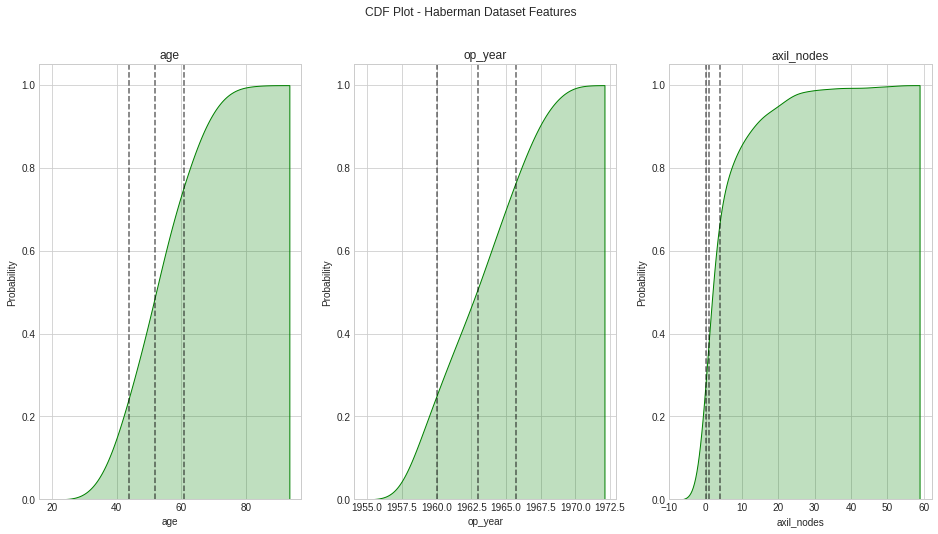

In [24]:
cdf_plotter(df=data_df, features=features)

This is a cumulative distribution function plot of our features. On the Y-axis, CDF plot shows probability values upto to certain point on the X-axis. We also see three vertical lines that represent the quantiles.

- From `age` CDF plot, we observe that $50\%$ of the patient's age lies between $30 - 52$ years.
- From `op_year` CDF plot, we observe that $50\%$ of patient's operations took place between $1958 - 1963$ year dates.
- From `axil_nodes` CDF plot, we oberve that $50\%$ of patients' axillary nodes are upto $1$.

ECDF Plot

In [25]:
def ecdf_plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 8))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('13' + '{}'.format(i+1)))
        sns.ecdfplot(x=df[feature], color='navy')
        plt.title(label=feature)
        percentiles = np.percentile(a=df[feature],
                                    q=np.array([25, 50, 75]))
        for quantile in percentiles:
            plt.axvline(x=quantile, ls='--', c='k', alpha=0.6)
        i += 1
    plt.suptitle(t='ECDF Plot - Haberman Dataset Features')
    plt.show()
    plt.close(fig='all')
    return None

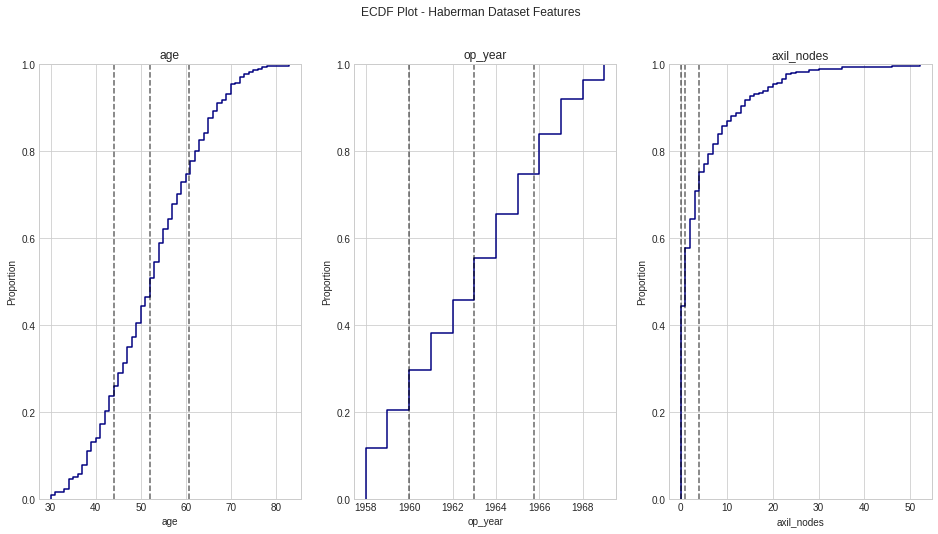

In [26]:
ecdf_plotter(df=data_df, features=features)

ECDF stands of Empirical Cumulative Distribution Function. Unlike Swarm plot which represents only count, ECDF plot represents the proportion or count of observations falling below each unique value in a dataset. We observe, $52$, $1958$ and $0$ are most common (or modal) values in `age`, `op_year`, `axil_nodes` features.

Box Plot

In [27]:
def box_plotter(df, features):
    """
    This is funtion helps in plotting the dataframes.
    """
    plt.figure(figsize=(16, 8))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('13' + '{}'.format(i+1)))
        sns.boxplot(x=target,
                    y=feature,
                    data=df,
                    palette='rainbow',
                    width=0.5,
                    fliersize=3)
        plt.title(label=feature)
        i += 1
    plt.suptitle(t='Box Plot - Haberman Dataset Features')
    plt.show()
    plt.close(fig='all')
    return None

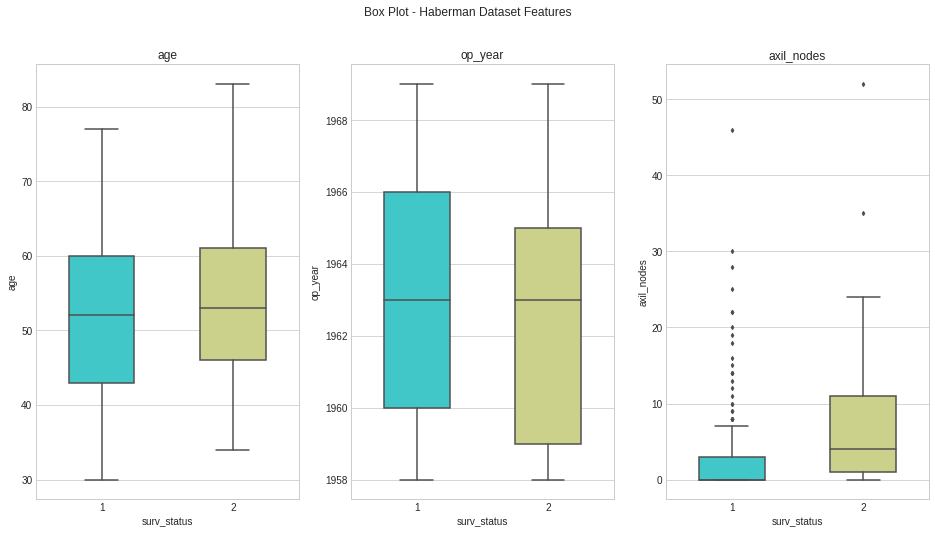

In [28]:
box_plotter(df=data_df, features=features)

The Box plot gives detailed visualization of quantiles, minimum and maximum values.

- From `age`, we observe that $50\%$ of the patient's age lies between $30 - 52$ years.
- From `op_year` CDF plot, we observe that $50\%$ of patient's operations took place between $1958 - 1963$ year dates.
- From `axil_nodes` CDF plot, we oberve that $50\%$ of patients' axillary nodes are upto $1$.

---

__1.4 Perform bivariate analysis - Plot 2D Scatter plots and Pair plots__

- Plot the required scatter plots and pair plots of different features to see which combination of features are useful for clasification task.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in Python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

Pair Plot

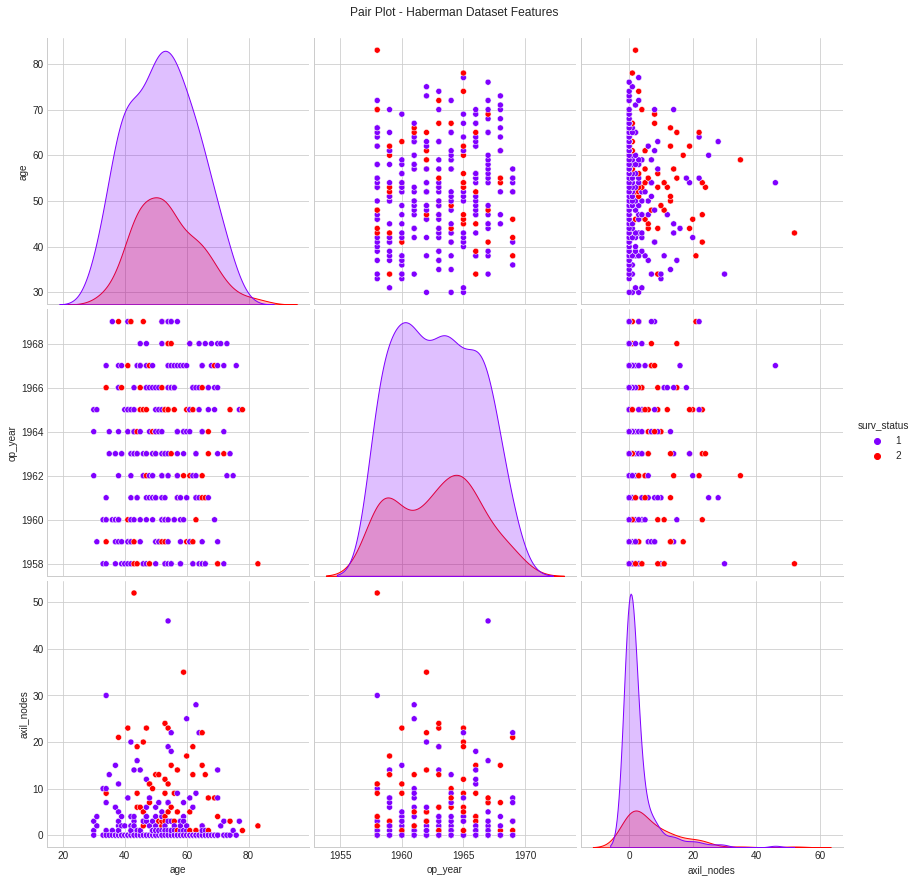

In [29]:
g = sns.pairplot(data=data_df, hue=target, height=4, palette='rainbow')
g.fig.suptitle(t='Pair Plot - Haberman Dataset Features', y=1.02)
plt.show()
plt.close(fig='all')

Pair plot represents pairwise relationships in a dataset. On the diagnols, univariate distribution plot is drawn to show the marginal distribution of the data in each column.

- We already observed diagnol PDF plots earlier. Every class in the `surv_status` target variable, overlaps with other class, hence it becomes harder to point-out which feature is fairly separating each class and which is not.
- Also, if we notice the scatter plots, there is no strong correlation across the features.

---

__1.5 Summarize your final conclusions of the exploration__

- You can desrcibe the key features that are important for the classification task.
- Try to quantify your results i.e., while writing observations include numbers, percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points.
- Write your observations in english as crisply and unambigously as possible.

Overall Conclusion

- Our dataset is an imbalanced dataset as the number of data-points of the classes for our target variable `surv_status` are not equal.
- Dataset has couple of outliers especially for `axil_nodes` feature. For some patients the count of axillary nodes cross $30$.
- None of the features are fairly separating the classes of our target variable `surv_status`.

---

End of the file.